# Comparing Feature Importances from Different Models

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = '/home/jln436/Internship_AUMC/'

In [3]:
lgbm_importance = pd.read_csv(path + "output/Importances/LightGBM_Importances_gain_no_cog_tests.csv")
rf_importance = pd.read_csv(path + "output/Importances/RF_Importances_no_cog_tests.csv")
Lasso_importance = pd.read_csv(path + "output/Importances/Lasso_Importances_no_cog_tests.csv")
Ridge_importance = pd.read_csv(path + "output/Importances/Ridge_Importances_no_cog_tests.csv")
SVM_importance = pd.read_csv(path + "output/Importances/SVM_Importances_no_cog_tests.csv")

In [3]:
# Overall Intersection between top 91 of all methods
all_included = set(lgbm_importance.features[0:91]).intersection(set(rf_importance.features[0:91]),
                                                set(Lasso_importance.features[0:91]),
                                                set(Ridge_importance.features[0:91]),
                                                set(SVM_importance.features[0:91]))

In [4]:
all_included

{'Bmir',
 'aeducat',
 'bage',
 'balcos04',
 'balcos09',
 'bbmi',
 'bcardig4',
 'bhob',
 'binccat',
 'bincsat2',
 'blphya23',
 'blphya24',
 'bmpeakf1',
 'bmpeakfu',
 'bnroomsc',
 'bqfood04'}

In [5]:
# How many features does Lasso Select
(Lasso_importance.coefficients != 0).sum()

91

In [6]:
# How many shared in the top features
# lgbm and rf
lgbm_rf = set(lgbm_importance.features[0:91]).intersection(set(rf_importance.features[0:91]))
# lgbm and Lasso
lgbm_lasso = set(lgbm_importance.features[0:91]).intersection(set(Lasso_importance.features[0:91]))
# lgbm and Ridge
lgbm_ridge = set(lgbm_importance.features[0:91]).intersection(set(Ridge_importance.features[0:91]))
# lgbm and SVM
lgbm_svm = set(lgbm_importance.features[0:91]).intersection(set(SVM_importance.features[0:91]))
# rf and Lasso
rf_lasso = set(rf_importance.features[0:91]).intersection(set(Lasso_importance.features[0:91]))
# rf and Ridge
rf_ridge = set(rf_importance.features[0:91]).intersection(set(Ridge_importance.features[0:91]))
# rf and SVM
rf_svm = set(rf_importance.features[0:91]).intersection(set(SVM_importance.features[0:91]))
# Lasso and Ridge
lasso_ridge = set(Lasso_importance.features[0:91]).intersection(set(Ridge_importance.features[0:91]))
# Lasso and SVM
lasso_svm = set(Lasso_importance.features[0:91]).intersection(set(SVM_importance.features[0:91]))
# Ridge and SVM
ridge_svm = set(Ridge_importance.features[0:91]).intersection(set(SVM_importance.features[0:91]))

In [21]:
print("\033[1mlgbm and rf overlap: " + str(len(lgbm_rf)) + "/91")
print("lgbm and lasso overlap: " + str(len(lgbm_lasso)) + "/91")
print("lgbm and ridge overlap: " + str(len(lgbm_ridge)) + "/91")
print("lgbm and svm overlap: " + str(len(lgbm_svm)) + "/91")
print("rf and lasso overlap: " + str(len(rf_lasso)) + "/91")
print("rf and ridge overlap: " + str(len(rf_ridge)) + "/91")
print("rf and svm overlap: " + str(len(rf_svm)) + "/91")
print("lasso and ridge overlap: " + str(len(lasso_ridge)) + "/91")
print("lasso and svm overlap: " + str(len(lasso_svm)) + "/91")
print("ridge and svm overlap: " + str(len(ridge_svm)) + "/91" + "\033[0m")

lgbm and rf overlap: 58/91
lgbm and lasso overlap: 32/91
lgbm and ridge overlap: 31/91
lgbm and svm overlap: 30/91
rf and lasso overlap: 32/91
rf and ridge overlap: 32/91
rf and svm overlap: 29/91
lasso and ridge overlap: 58/91
lasso and svm overlap: 50/91
ridge and svm overlap: 60/91


## Non-parametric tests for correlation

In [8]:
# First need to arrange the datasets all in the same order
df = lgbm_importance.merge(rf_importance, how = "left")
df.rename(columns={"Value": "lgbm", "importance": 'rf'}, inplace = True)
df = df.merge(Lasso_importance, how = "left")
df.rename(columns={"coefficients": "lasso"}, inplace = True)
df = df.merge(Ridge_importance, how = "left")
df.rename(columns={"coefficients": "ridge"}, inplace = True)
df = df.merge(SVM_importance, how = "left")
df.rename(columns={"coefficients": "svm"}, inplace = True)

In [9]:
# Than compute the test
import scipy
print("Spearman: ---------------------------------------------------")
print("Spearman correlation lgbm vs rf: " + str(round(scipy.stats.spearmanr(df.lgbm, df.rf)[0],3)))
print("Spearman correlation lgbm vs lasso: " + str(round(scipy.stats.spearmanr(df.lgbm, df.lasso)[0],3)))
print("Spearman correlation lgbm vs ridge: " + str(round(scipy.stats.spearmanr(df.lgbm, df.ridge)[0],3)))
print("Spearman correlation lgbm vs svm: " + str(round(scipy.stats.spearmanr(df.lgbm, df.svm)[0],3)))
print("Spearman correlation rf vs lasso: " + str(round(scipy.stats.spearmanr(df.rf, df.lasso)[0],3)))
print("Spearman correlation rf vs ridge: " + str(round(scipy.stats.spearmanr(df.rf, df.ridge)[0],3)))
print("Spearman correlation rf vs svm: " + str(round(scipy.stats.spearmanr(df.rf, df.svm)[0],3)))
print("Spearman correlation lasso vs ridge: " + str(round(scipy.stats.spearmanr(df.lasso, df.ridge)[0],3)))
print("Spearman correlation lasso vs svm: " + str(round(scipy.stats.spearmanr(df.lasso, df.svm)[0],3)))
print("Spearman correlation ridge vs svm: " + str(round(scipy.stats.spearmanr(df.ridge, df.svm)[0],3)))

print("\nKendall: ---------------------------------------------------")
print("Kendall correlation lgbm vs rf: " + str(round(scipy.stats.kendalltau(df.lgbm, df.rf)[0],3)))
print("Kendall correlation lgbm vs lasso: " + str(round(scipy.stats.kendalltau(df.lgbm, df.lasso)[0],3)))
print("Kendall correlation lgbm vs ridge: " + str(round(scipy.stats.kendalltau(df.lgbm, df.ridge)[0],3)))
print("Kendall correlation lgbm vs svm: " + str(round(scipy.stats.kendalltau(df.lgbm, df.svm)[0],3)))
print("Kendall correlation rf vs lasso: " + str(round(scipy.stats.kendalltau(df.rf, df.lasso)[0],3)))
print("Kendall correlation rf vs ridge: " + str(round(scipy.stats.kendalltau(df.rf, df.ridge)[0],3)))
print("Kendall correlation rf vs svm: " + str(round(scipy.stats.kendalltau(df.rf, df.svm)[0],3)))
print("Kendall correlation lasso vs ridge: " + str(round(scipy.stats.kendalltau(df.lasso, df.ridge)[0],3)))
print("Kendall correlation lasso vs svm: " + str(round(scipy.stats.kendalltau(df.lasso, df.svm)[0],3)))
print("Kendall correlation ridge vs svm: " + str(round(scipy.stats.kendalltau(df.ridge, df.svm)[0],3)))

Spearman: ---------------------------------------------------
Spearman correlation lgbm vs rf: 0.769
Spearman correlation lgbm vs lasso: -0.034
Spearman correlation lgbm vs ridge: -0.019
Spearman correlation lgbm vs svm: -0.034
Spearman correlation rf vs lasso: 0.045
Spearman correlation rf vs ridge: 0.059
Spearman correlation rf vs svm: 0.044
Spearman correlation lasso vs ridge: 0.61
Spearman correlation lasso vs svm: 0.586
Spearman correlation ridge vs svm: 0.879

Kendall: ---------------------------------------------------
Kendall correlation lgbm vs rf: 0.601
Kendall correlation lgbm vs lasso: -0.028
Kendall correlation lgbm vs ridge: -0.013
Kendall correlation lgbm vs svm: -0.023
Kendall correlation rf vs lasso: 0.037
Kendall correlation rf vs ridge: 0.042
Kendall correlation rf vs svm: 0.029
Kendall correlation lasso vs ridge: 0.505
Kendall correlation lasso vs svm: 0.481
Kendall correlation ridge vs svm: 0.7


## Visualize Feature Importances to find cutoff

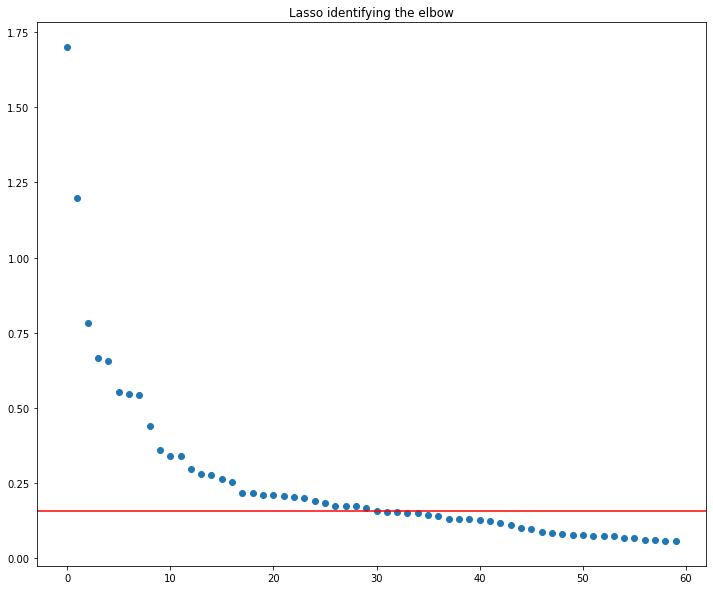

In [10]:
# For Lasso finding a clear elbow at 38 features
plt.figure(figsize=(12, 10))
plt.scatter(range(60), abs(Lasso_importance.coefficients[0:60]))
plt.title("Lasso identifying the elbow")
plt.axhline(y=abs(Lasso_importance.coefficients[30]),color='red')
plt.show()

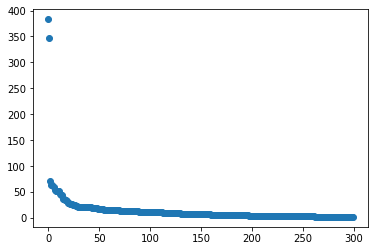

In [11]:
# For lgbm finding a clear elbow around 110 featues
plt.scatter(range(300), abs(lgbm_importance.Value[0:300]))

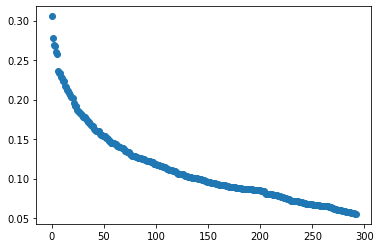

In [12]:
# For Ridge no clear elbow
plt.scatter(range(293), abs(Ridge_importance.coefficients[7:300]))

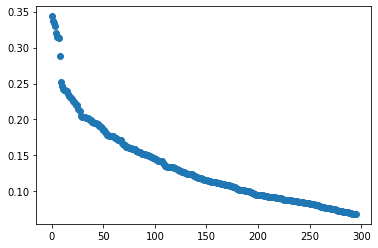

In [13]:
# For SVM No clear elbow
plt.scatter(range(296), abs(SVM_importance.coefficients[4:300]))

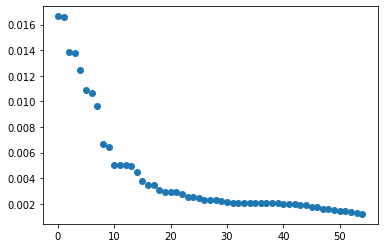

In [14]:
# For Random Forest elbow around 15-20
plt.scatter(range(55), abs(rf_importance.importance[5:60]))

## Make table for shared features

In [15]:
Lasso_importance[0:91]

,features,coefficients
0,bage,-1.700424e+00
1,aeducat,1.196969e+00
2,sex,7.811024e-01
3,bmpeakfu,-6.675324e-01
4,blphya24,6.566329e-01
...,...,...
86,Burb_y,7.024787e-04
87,bmed_ali,4.782870e-04
88,balcos01,-2.806825e-04
89,bwalk02,3.163827e-16


In [16]:
tmp_list = list(lgbm_importance.features[0:91]) + list(rf_importance.features[0:91]) + list(Lasso_importance.features[0:91]) + list(Ridge_importance.features[0:91]) + list(SVM_importance.features[0:91])
combined_features = list(np.unique(tmp_list))

In [17]:
shared_features = pd.DataFrame(data = combined_features, columns = ['feature_name'])

In [18]:
shared_features['lgmb'] = ''
shared_features['lgmb'] = np.where(np.isin(shared_features['feature_name'], lgbm_importance['features'][0:91]), 1, 0)
shared_features['rf'] = ''
shared_features['rf'] = np.where(np.isin(shared_features['feature_name'], rf_importance['features'][0:91]), 1, 0)
shared_features['lasso'] = ''
shared_features['lasso'] = np.where(np.isin(shared_features['feature_name'], Lasso_importance['features'][0:91]), 1, 0)
shared_features['ridge'] = ''
shared_features['ridge'] = np.where(np.isin(shared_features['feature_name'], Ridge_importance['features'][0:91]), 1, 0)
shared_features['svm'] = ''
shared_features['svm'] = np.where(np.isin(shared_features['feature_name'], SVM_importance['features'][0:91]), 1, 0)

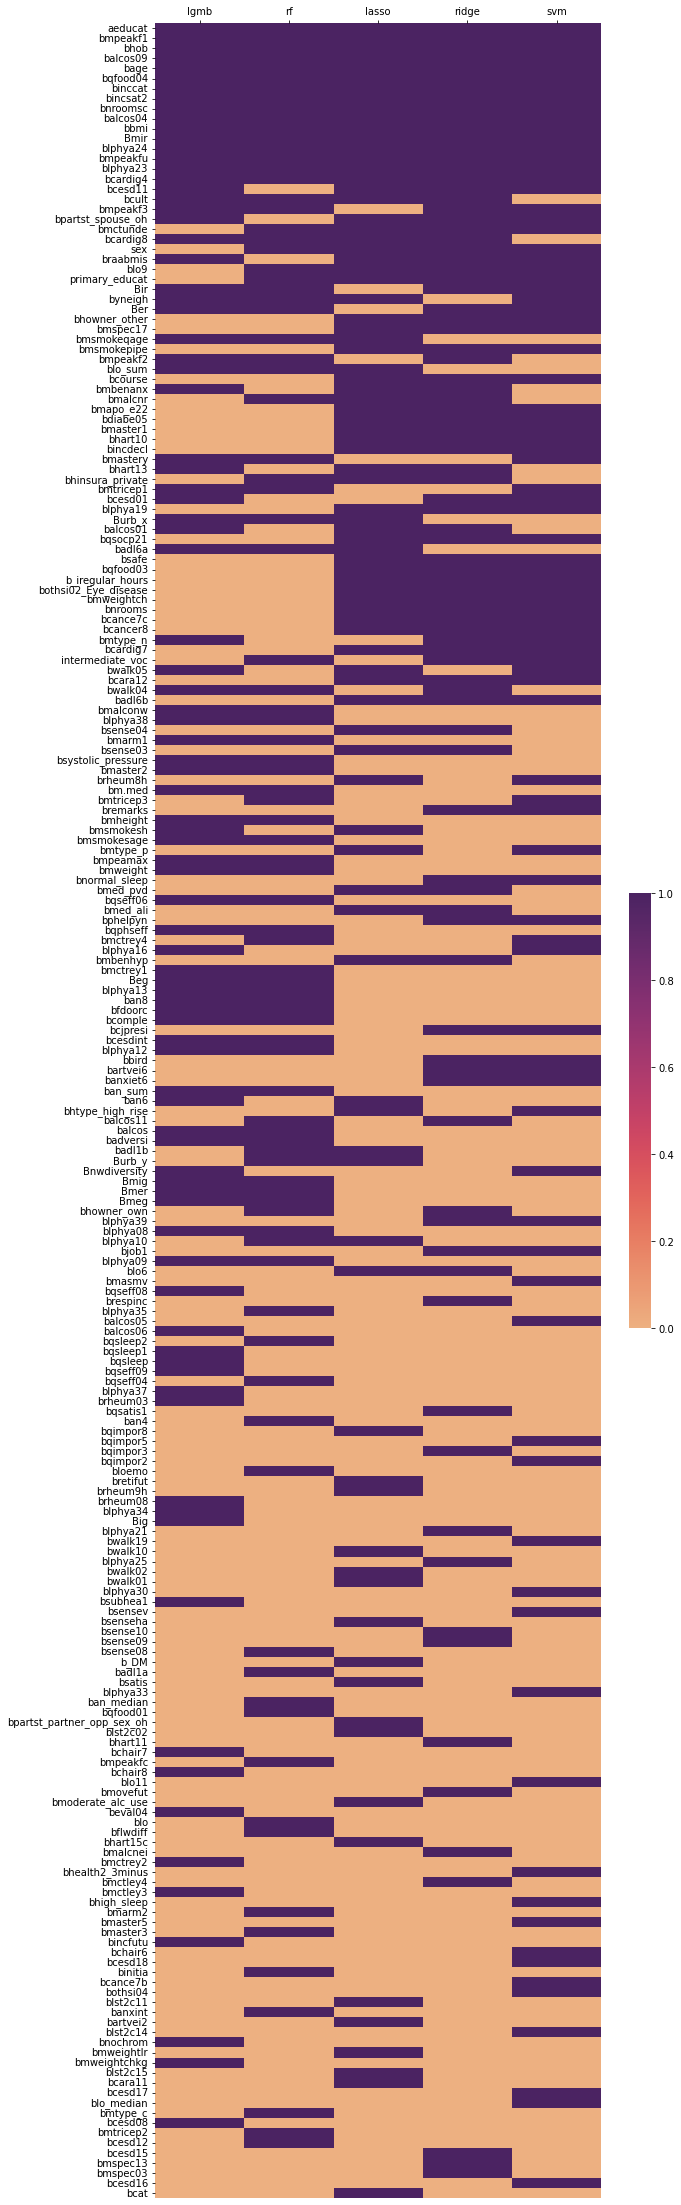

In [19]:
shared_features['row_total'] = shared_features['lgmb']+shared_features['rf']+shared_features['lasso']+shared_features['ridge']+shared_features['svm']
shared_features = shared_features.sort_values(by=['row_total'], ascending = False)
shared_features.drop(columns = 'row_total', inplace = True)
# Plot heatmap
fig, ax = plt.subplots(figsize=(10,40))
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax = sns.heatmap(shared_features[['lgmb','rf','lasso','ridge','svm']], 
            yticklabels = shared_features.feature_name, cbar = True, cmap = sns.color_palette("flare", as_cmap=True),  cbar_kws={"shrink": 0.2})
plt.savefig('shared_features_no_cog_tests_heatmap.png')

In [20]:
# Save feature importance
shared_features.to_csv(path + 'output/Importances/shared_importances_no_cog_tests.csv', index = False)

## Read back in importances with themes to make new heatmaps

In [4]:
# Save feature importance
shared_features_t = pd.read_csv(path + 'output/Importances/shared_importances_no_cog_tests_themes.csv')

In [5]:
shared_features_t.Theme.value_counts()

Physical        111
Social           38
Emotional        38
Demographics     15
Care              9
Work              4
Cognitive         1
Biomaterial       1
Name: Theme, dtype: int64

In [7]:
lgbm_importance.reset_index(inplace=True)
lgbm_importance.rename(columns = {'index':'lgbm_rank', 'features': 'feature_name'}, inplace = True)
rf_importance.reset_index(inplace=True)
rf_importance.rename(columns = {'index':'rf_rank', 'features': 'feature_name'}, inplace = True)
Lasso_importance.reset_index(inplace=True)
Lasso_importance.rename(columns = {'index':'lasso_rank', 'features': 'feature_name'}, inplace = True)
Ridge_importance.reset_index(inplace=True)
Ridge_importance.rename(columns = {'index':'ridge_rank', 'features': 'feature_name'}, inplace = True)
SVM_importance.reset_index(inplace=True)
SVM_importance.rename(columns = {'index':'svm_rank', 'features': 'feature_name'}, inplace = True)

In [8]:
Lasso_importance

,lasso_rank,feature_name,coefficients
0,0,bage,-1.700424
1,1,aeducat,1.196969
2,2,sex,0.781102
3,3,bmpeakfu,-0.667532
4,4,blphya24,0.656633
...,...,...,...
519,519,bothsi02_Backproblems,-0.000000
520,520,bothsi02_Hypertension,0.000000
521,521,brheum_01_and_02,0.000000
522,522,brheum9g,-0.000000


In [9]:
shared_features_f = shared_features_t.merge(lgbm_importance)
shared_features_f = shared_features_f.merge(rf_importance)
shared_features_f = shared_features_f.merge(Lasso_importance)
shared_features_f.drop(columns = ['Value','importance','coefficients'], inplace = True)
shared_features_f = shared_features_f.merge(Ridge_importance)
shared_features_f.drop(columns = ['coefficients'], inplace = True)
shared_features_f = shared_features_f.merge(SVM_importance)
shared_features_f.drop(columns = ['coefficients'], inplace = True)

In [10]:
shared_features_f.sort_values('Theme', inplace = True)

In [11]:
# Set the colors
lut = dict(zip(shared_features_f.Theme.unique(), sns.color_palette("Paired")))
row_colors = shared_features_f.Theme.map(lut)


In [12]:
shared_features_f

,feature_name,lgmb,rf,lasso,ridge,svm,file,Theme,lgbm_rank,rf_rank,lasso_rank,ridge_rank,svm_rank
206,bmapo_e22,0,0,1,1,1,870,Biomaterial,497,495,83,63,36
184,bmspec03,0,0,0,1,0,245,Care,385,361,251,79,130
183,bmspec13,0,0,0,1,0,245,Care,435,390,254,87,96
89,blst2c15,0,0,1,0,0,44,Care,473,351,81,146,142
88,blst2c14,0,0,0,0,1,44,Care,387,352,196,159,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,ban4,0,1,0,0,0,78,Social,149,76,414,300,163
16,bretifut,0,0,1,0,0,16,Work,450,233,71,317,256
13,b_iregular_hours,0,0,1,1,1,16,Work,234,487,13,24,33
15,bjob1,0,0,0,1,1,16,Work,418,235,240,57,40


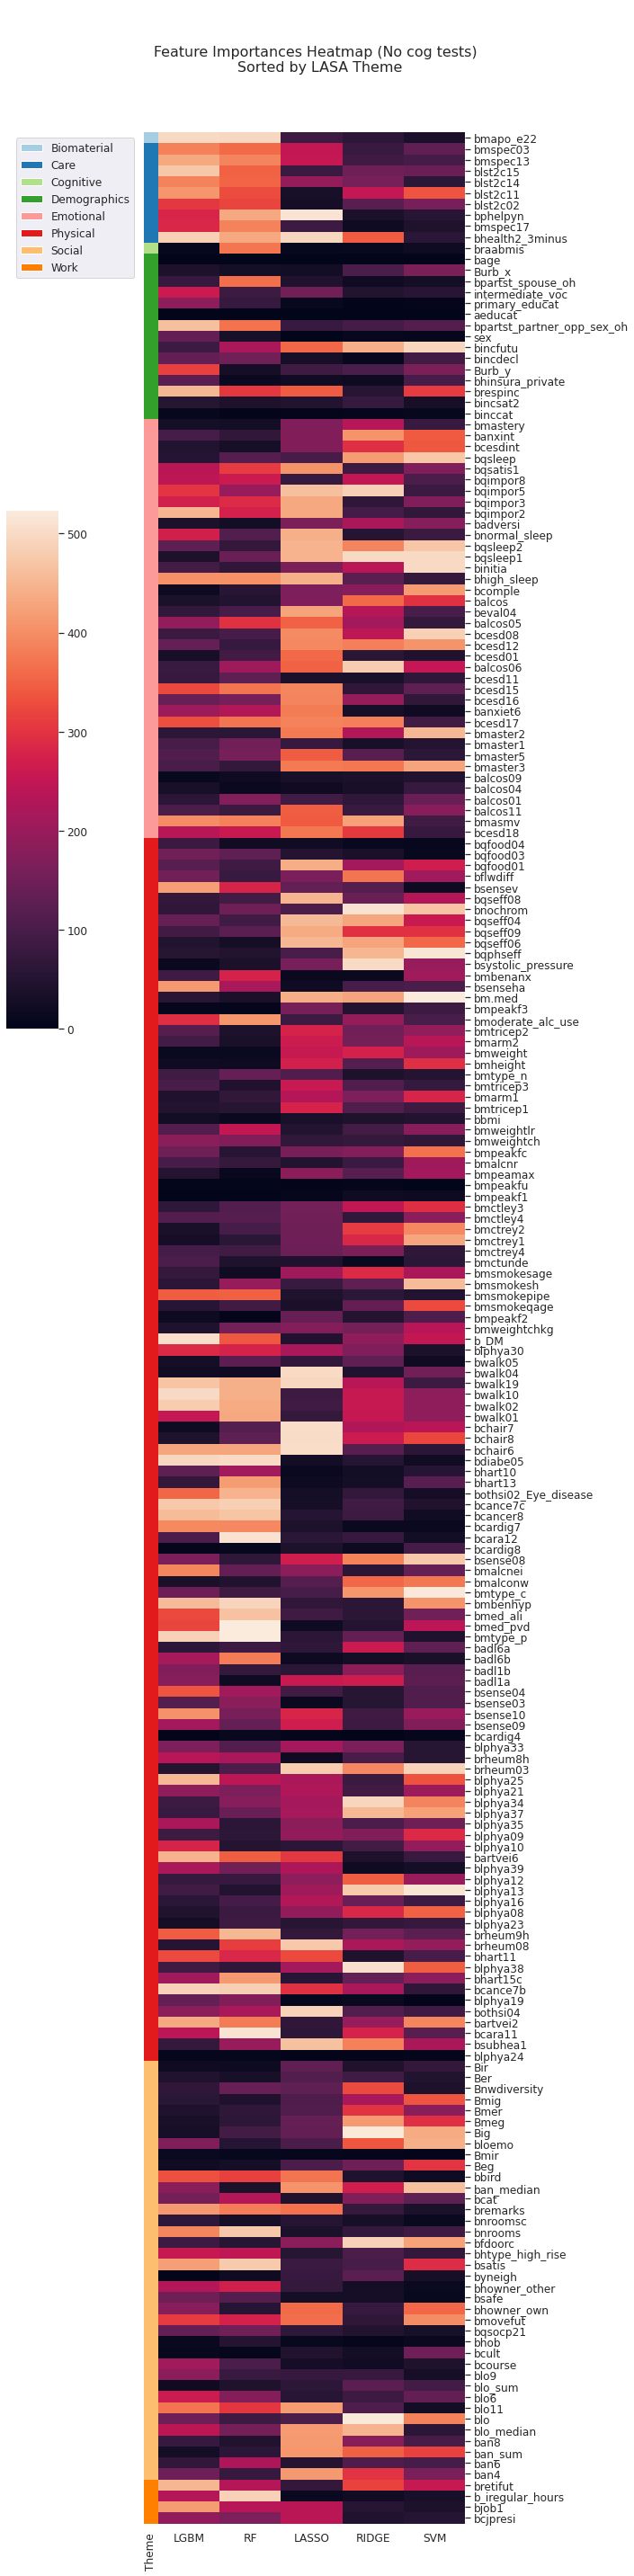

In [18]:
sns.set(font_scale=1.1)
g = sns.clustermap(shared_features_f[['lgbm_rank','rf_rank','lasso_rank','ridge_rank','svm_rank']], 
                   # Turn off the clustering
                   row_cluster=False, col_cluster=False,
                   figsize = (10,40),
                   cbar_pos=(.02, .6, .08, .2),
                   yticklabels = shared_features_f.feature_name,
                   xticklabels = ['LGBM','RF','LASSO','RIDGE','SVM'],
                   cmap = sns.color_palette("rocket", as_cmap=True),
                   dendrogram_ratio=(0.3, 0.05),
                   row_colors = row_colors)

for label in shared_features_f.Theme.unique():
    g.ax_row_dendrogram.bar(0, 0, color=lut[label],
                            label=label, linewidth=1)
g.ax_row_dendrogram.legend(loc="upper center", ncol=1)
g.fig.suptitle('Feature Importances Heatmap (No cog tests) \n Sorted by LASA Theme')
g.savefig('shared_features_heatmap_no_cog_tests_themes.png')
